## Import libraries

In [1]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization

from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os

import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns

import sklearn

import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix


%matplotlib inline

C:\Users\SASIDHAR\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Importing Data

In [2]:
imageSize=50
train_dir = "C:\\Users\\SASIDHAR\\Desktop\\sign_lang\\asl_alphabet_train\\"
test_dir =  "C:\\Users\\SASIDHAR\\Desktop\\sign_lang\\asl_alphabet_test\\"
from tqdm import tqdm
def get_data(folder):
   
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '//' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


In [3]:


folder = 'C:\\Users\\SASIDHAR\\Desktop\\sign_lang\\asl_alphabet_train\\'
images = []

for folderName in os.listdir(folder):
    if not folderName.startswith('.'):
        for image_filename in tqdm(os.listdir(os.path.join(folder, folderName))):
            img_file = cv2.imread(os.path.join(folder, folderName, image_filename))
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                img_arr = np.asarray(img_file)
                images.append(img_arr)
                    
images = np.asarray(images)



100%|██████████| 3000/3000 [00:19<00:00, 155.03it/s]


In [4]:
from keras.utils import to_categorical

X_train, y_train = get_data(train_dir) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 


y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)

100%|██████████| 3000/3000 [00:59<00:00, 50.48it/s]


In [5]:
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

## Data Visualization

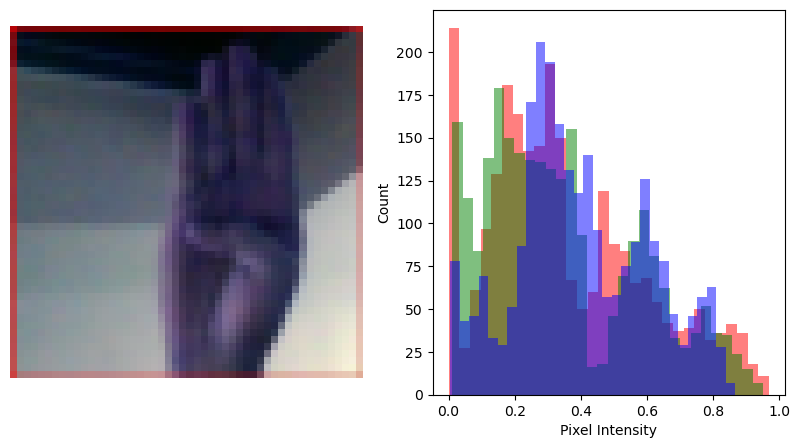

In [6]:
def plotHistogram(a):
  
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


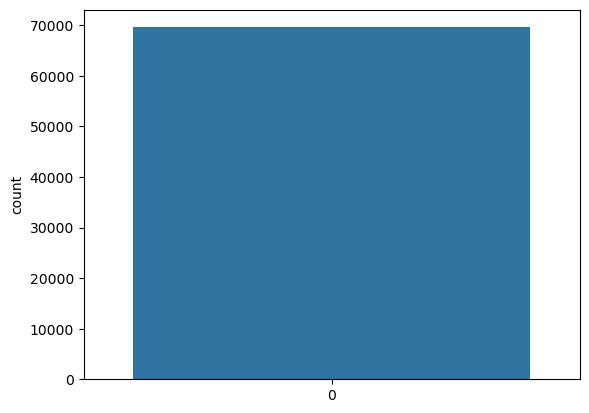

In [7]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

## Model Creation

In [8]:
def Convolution(input_tensor , filters):
    x = Conv2D(filters = filters ,  kernel_size=(3, 3), padding='same',strides =(1,1) ,kernel_regularizer = l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    
    return x

In [9]:
from tensorflow.keras.layers import Input, Flatten, Dense, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.models import Model

def model(input_shape, num_classes):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    maxpool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Conv2D(256, (3, 3), activation='relu')(maxpool_3)
    maxpool_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    
    flat = Flatten()(maxpool_4)
    dense1 = Dense(64, activation='relu')(flat)
    drop1 = Dropout(0.2)(dense1)
    
    # Output layer with num_classes units and 'softmax' activation
    output1 = Dense(num_classes, activation='softmax', name='sign_label')(drop1)
    
    model = Model(inputs=inputs, outputs=output1)
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


input_shape = (50, 50, 3)  
num_classes = 30  




In [10]:
Model = model((50,50,3) , 30)

In [11]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856 

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

fle = 'C:\\Users\\SASIDHAR\\Desktop\\sign_lang\\Sign_detection.h5'
checkpoint = ModelCheckpoint(fle, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early = EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
call_list = [checkpoint, Early]


In [14]:
Hist = Model.fit(X_train , y_trainHot , batch_size = 64  , validation_data = (X_test , y_testHot) , epochs = 16 ,callbacks = call_list)

Epoch 1/16
469/469 [==============================] - ETA: 0s - loss: 2.1816 - accuracy: 0.3471
Epoch 1: val_loss improved from inf to 0.79923, saving model to C:\Users\SASIDHAR\Desktop\sign_lang\Sign_detection.h5
469/469 [==============================] - 176s 366ms/step - loss: 2.1816 - accuracy: 0.3471 - val_loss: 0.7992 - val_accuracy: 0.7591
Epoch 2/16


C:\Users\SASIDHAR\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.7569
Epoch 2: val_loss improved from 0.79923 to 0.34972, saving model to C:\Users\SASIDHAR\Desktop\sign_lang\Sign_detection.h5
469/469 [==============================] - 96s 205ms/step - loss: 0.7157 - accuracy: 0.7569 - val_loss: 0.3497 - val_accuracy: 0.8870
Epoch 3/16
469/469 [==============================] - ETA: 0s - loss: 0.3873 - accuracy: 0.8661
Epoch 3: val_loss improved from 0.34972 to 0.27106, saving model to C:\Users\SASIDHAR\Desktop\sign_lang\Sign_detection.h5
469/469 [==============================] - 95s 202ms/step - loss: 0.3873 - accuracy: 0.8661 - val_loss: 0.2711 - val_accuracy: 0.9057
Epoch 4/16
469/469 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.9134
Epoch 4: val_loss improved from 0.27106 to 0.11133, saving model to C:\Users\SASIDHAR\Desktop\sign_lang\Sign_detection.h5
469/469 [==============================] - 92s 196ms/step - loss: 0.2443 - accuracy: 0.91

## Model Evaluation

In [15]:
Model.evaluate(X_test ,y_testHot)

544/544 [==============================] - 14s 26ms/step - loss: 0.0189 - accuracy: 0.9936


[0.018861129879951477, 0.9935632348060608]

In [16]:
pred = Model.predict(X_test)

544/544 [==============================] - 13s 23ms/step


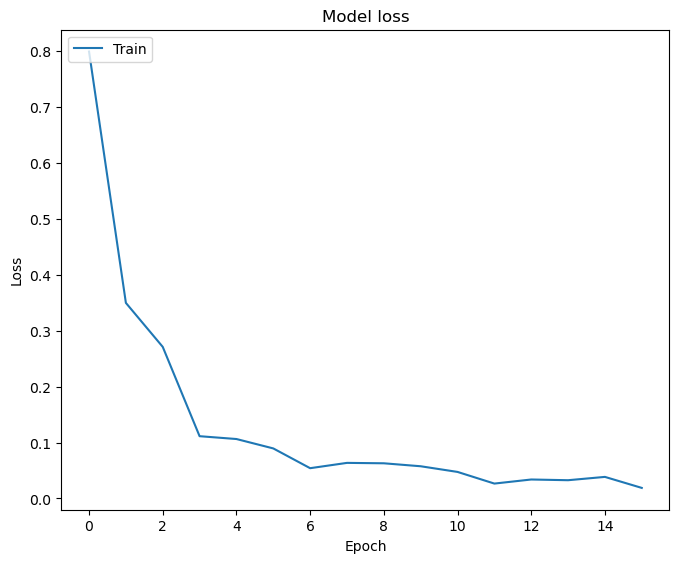

In [17]:
plt.plot(Hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train' ] , loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom = 0.0 , right = 0.95 ,left = 0 , hspace = 0.25 ,wspace = 0.35 )

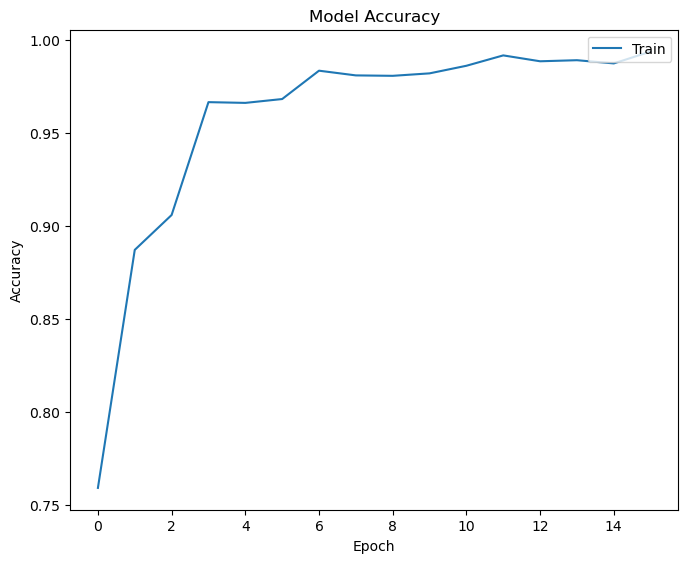

In [18]:
plt.plot(Hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'] , loc = 'upper right')
plt.subplots_adjust(top = 1.0 , bottom = 0.0 , right = 0.95 ,left = 0 , hspace = 0.25 ,wspace = 0.35 )

## Model Report

In [19]:
import numpy as np

i = 0
Pred_l = []

while i < len(pred):
   
    rounded_row = [int(np.round(pred[i][j])) for j in range(len(pred[i]))]
    Pred_l.append(rounded_row)
    i += 1


In [20]:
from sklearn.metrics import confusion_matrix , classification_report

report = classification_report(y_testHot , Pred_l)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       626
           1       1.00      0.99      1.00       612
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       613
           4       0.99      1.00      0.99       559
           5       1.00      1.00      1.00       614
           6       0.98      1.00      0.99       602
           7       1.00      0.98      0.99       584
           8       1.00      1.00      1.00       630
           9       1.00      1.00      1.00       608
          10       0.99      0.99      0.99       598
          11       1.00      1.00      1.00       644
          12       1.00      0.99      0.99       579
          13       0.99      1.00      1.00       604
          14       0.99      1.00      1.00       602
          15       1.00      0.99      1.00       609
          16       0.99      0.99      0.99       567
          17       0.96    

C:\Users\SASIDHAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SASIDHAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SASIDHAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix


y_test_cat = np.argmax(y_testHot, axis=1)
Pred_cat = np.argmax(Pred_l, axis=1)


con = confusion_matrix(y_test_cat, Pred_cat)


In [22]:
print(con)

[[623   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   2   0   0   0   0   0]
 [  1 606   0   1   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  1   0 599   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 613   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 557   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 614   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 601   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10 572   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

<Axes: >

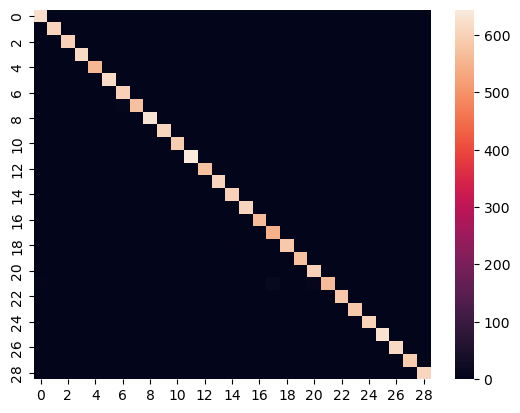

In [23]:
import seaborn as sns
sns.heatmap(con)

## Test Function

In [24]:
import matplotlib.pyplot as plt

def test_image(ind, Model, images ):
   
    image_test = np.array([images[ind]])
    
    
    pred = Model.predict(image_test)
    
    
    predicted_gesture_index = np.argmax(pred[0])
    
   
    map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                      10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                      19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 
                      28: 'space', 29: 'other'}

    predicted_gesture = map_characters[predicted_gesture_index]
    
    print(predicted_gesture)
    plt.imshow(images[ind])
    plt.title("Predicted sign language gesture: " + predicted_gesture)
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 48ms/step
A


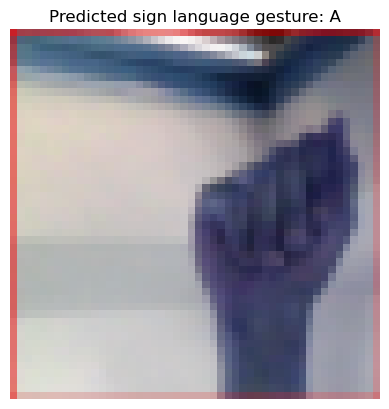

In [25]:
 test_image(4 , Model , images )

1/1 [==============================] - 0s 37ms/step
A


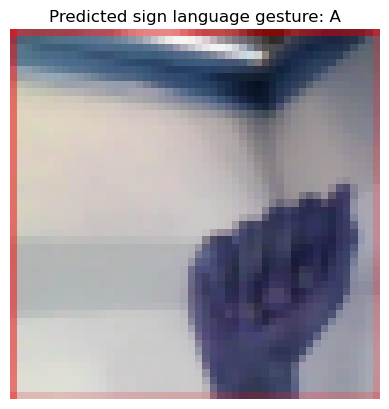

In [26]:
 test_image( 20 , Model , images )

1/1 [==============================] - 0s 31ms/step
B


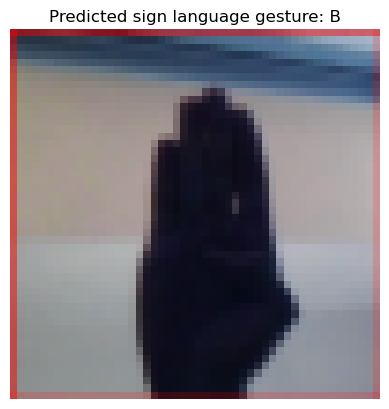

In [27]:
test_image( 4000 , Model , images )

1/1 [==============================] - 0s 28ms/step
C


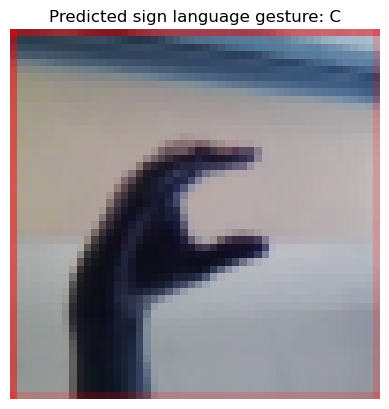

In [28]:
test_image( 8000 , Model , images )

1/1 [==============================] - 0s 35ms/step
O


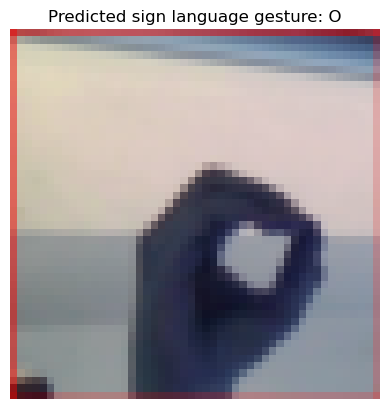

In [30]:
test_image( 50000, Model , images )

1/1 [==============================] - 0s 23ms/step
F


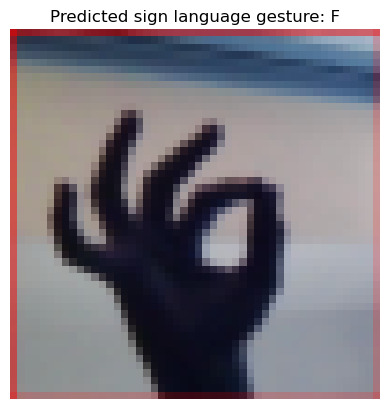

In [32]:
test_image( 20000 , Model , images )

1/1 [==============================] - 0s 30ms/step
T


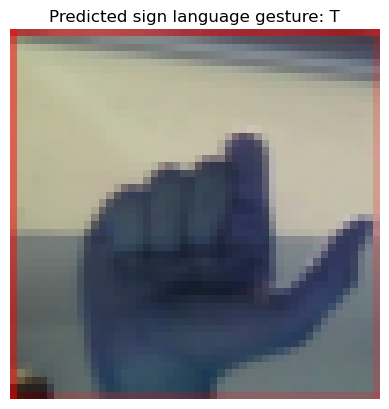

In [35]:
test_image( 66000, Model , images )

1/1 [==============================] - 0s 51ms/step
W


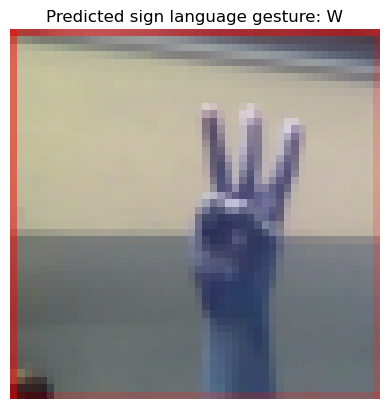

In [37]:
test_image( 77700, Model , images )

1/1 [==============================] - 0s 25ms/step
Z


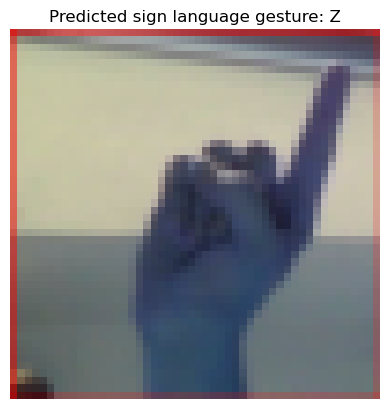

In [41]:
test_image( 86999, Model , images )

1/1 [==============================] - 0s 45ms/step
J


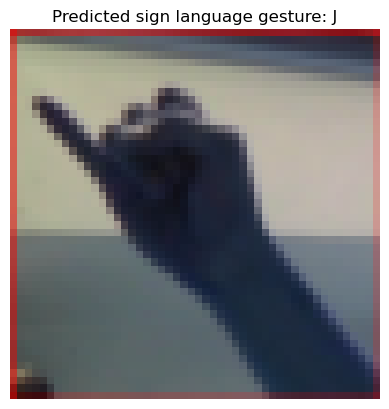

In [42]:
test_image( 31000 , Model , images )